In [102]:
import catboost as cb
import shap
from sklearn.model_selection import train_test_split
import pandas as pd

In [103]:
data = pd.read_csv("./csv/training_data.csv")
data

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Visceral Fat Rating (VFR),Hepatic Fat Accumulation (HFA)
0,0,50,0,0,0,0,0,0,185,9,0
1,0,47,0,1,0,0,0,0,176,15,0
2,0,61,0,0,0,0,0,0,171,15,0
3,0,41,0,0,0,0,0,0,168,6,1
4,0,42,0,0,0,0,0,0,178,8,2
...,...,...,...,...,...,...,...,...,...,...,...
314,1,49,0,0,0,0,0,0,178,11,2
315,1,31,1,0,0,0,0,0,157,2,0
316,1,58,0,0,0,0,0,0,172,16,2
317,1,37,1,0,0,0,0,0,177,8,3


In [104]:
X = data.drop(columns=['Gallstone Status'])
y = data['Gallstone Status']
feature_names = X.columns.tolist()

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
model = cb.CatBoostClassifier(verbose=0, random_seed=42)

In [107]:
model.fit(X_train, y_train)

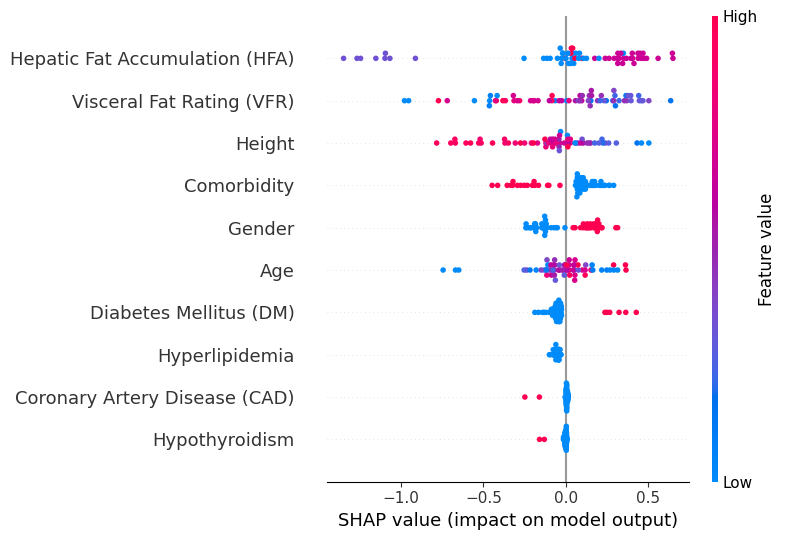

In [108]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [109]:
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)
shap_df

,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Visceral Fat Rating (VFR),Hepatic Fat Accumulation (HFA)
0,-0.149382,-0.196084,0.089828,0.003445,-0.000178,-0.035567,-0.048938,-0.578618,0.233480,0.037982
1,-0.039003,-0.140719,0.106442,0.002623,-0.001786,-0.042510,-0.060231,-0.126596,0.137310,-0.913338
2,-0.090504,-0.004924,-0.355766,-0.160108,-0.014214,-0.072811,-0.141580,0.089469,-0.314230,0.098673
3,0.292040,-0.210932,0.127790,0.002382,-0.000376,-0.041711,-0.054701,-0.698444,0.143044,0.239724
4,-0.012291,-0.178939,0.070277,0.005111,0.001053,-0.037824,-0.035180,-0.066295,0.443340,0.028816
...,...,...,...,...,...,...,...,...,...,...
59,0.249579,-0.183806,0.209462,0.002582,-0.000879,-0.041790,-0.039266,-0.371749,0.059012,0.055415
60,0.023949,0.056553,0.291171,0.014370,-0.001877,-0.047354,-0.042980,0.010043,-0.421732,0.368494
61,-0.669788,0.217454,0.062680,0.005294,0.004831,-0.035966,-0.035582,-0.113621,-0.979772,-0.033649
62,-0.002112,0.133433,-0.192527,0.011799,-0.004329,-0.092932,-0.098655,-0.079208,0.396739,-1.246334


In [110]:
shap_df.describe()

,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Visceral Fat Rating (VFR),Hepatic Fat Accumulation (HFA)
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,-0.014061,-0.001283,0.029797,0.000064,-0.005265,-0.051097,-0.026377,-0.092151,-0.003330,0.028755
std,0.205853,0.168781,0.186223,0.038027,0.025846,0.014981,0.116177,0.287005,0.369374,0.494891
min,-0.744991,-0.242734,-0.447399,-0.248390,-0.159375,-0.099747,-0.187798,-0.784330,-0.979772,-1.349623
25%,-0.087776,-0.141848,-0.052007,0.003715,-0.004476,-0.060051,-0.066886,-0.219006,-0.283723,-0.020744
50%,-0.004695,-0.054702,0.088358,0.005797,-0.000210,-0.046554,-0.049213,-0.047751,0.086893,0.080548
75%,0.074626,0.169457,0.144287,0.009380,0.002906,-0.040630,-0.035690,0.077327,0.291602,0.350194
max,0.366157,0.315215,0.291171,0.015789,0.009365,-0.028908,0.428454,0.504795,0.637397,0.651295


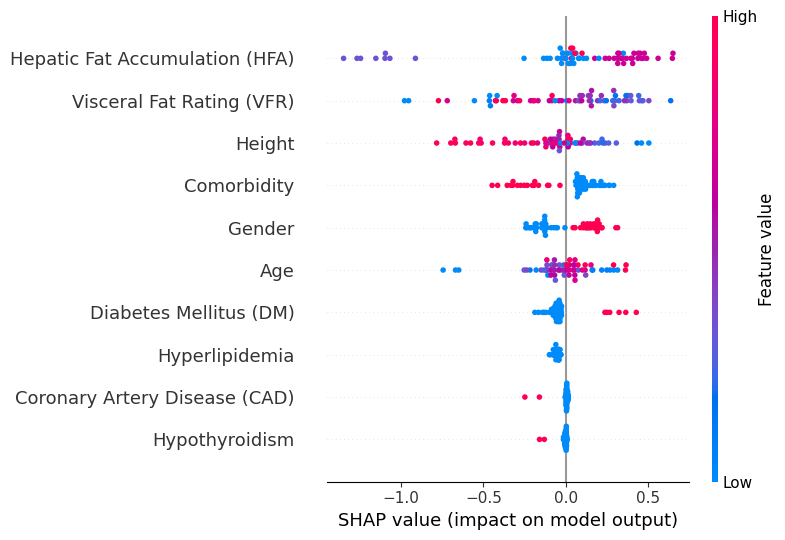

In [111]:
shap.summary_plot(shap_values, X_test)

## On décide donc de garder les 5 premières variables explications dans le cadre de notre prédiction